# Data Visualization in Python  
Let's get started with actually seeing our data! We'll import `matplotlib.pyplot` and `seaborn` - which are the core plotting libraries in Python and we'll also make use of `pandas` so we can work with a dataset and see how we can visualize the data there!

In [2]:
## import the libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
## let's use our pevious dataset, we're going to read in the file we created in the past

data = pd.read_csv("our_final_df.tsv", sep='\t', index_col=0)

data.head()

,Duration,Date,Pulse,Maxpulse,Calories,Sex
0,60,'2020/12/01',111,130,409.1,M
1,60,'2020/12/02',118,145,479.0,M
2,60,'2020/12/03',104,135,340.0,F
3,45,'2020/12/04',110,175,282.4,F
4,45,'2020/12/05',118,148,406.0,F


We'll first look at `matplotlib`! `matplotlib` is a plotting library with lots of different functionalities. It's a little cryptic at times, especially if you want to create more custom plots, but it has loads of neat functions and there's a lot of cool, complicated plots you can make with it... It just might take a LOT of google search and trial and error to get what you want. Nonetheless, it's very neat and probably the first thing you'll use to get some plots going.   



Now there are a few things to know -> `matplotlib` has a `figure` object and an `axes` object. You can think of the `figure` as the overall plot, while the `axes` might refer to the smaller items inside the figure - this might become more clear when we try to create subplots!

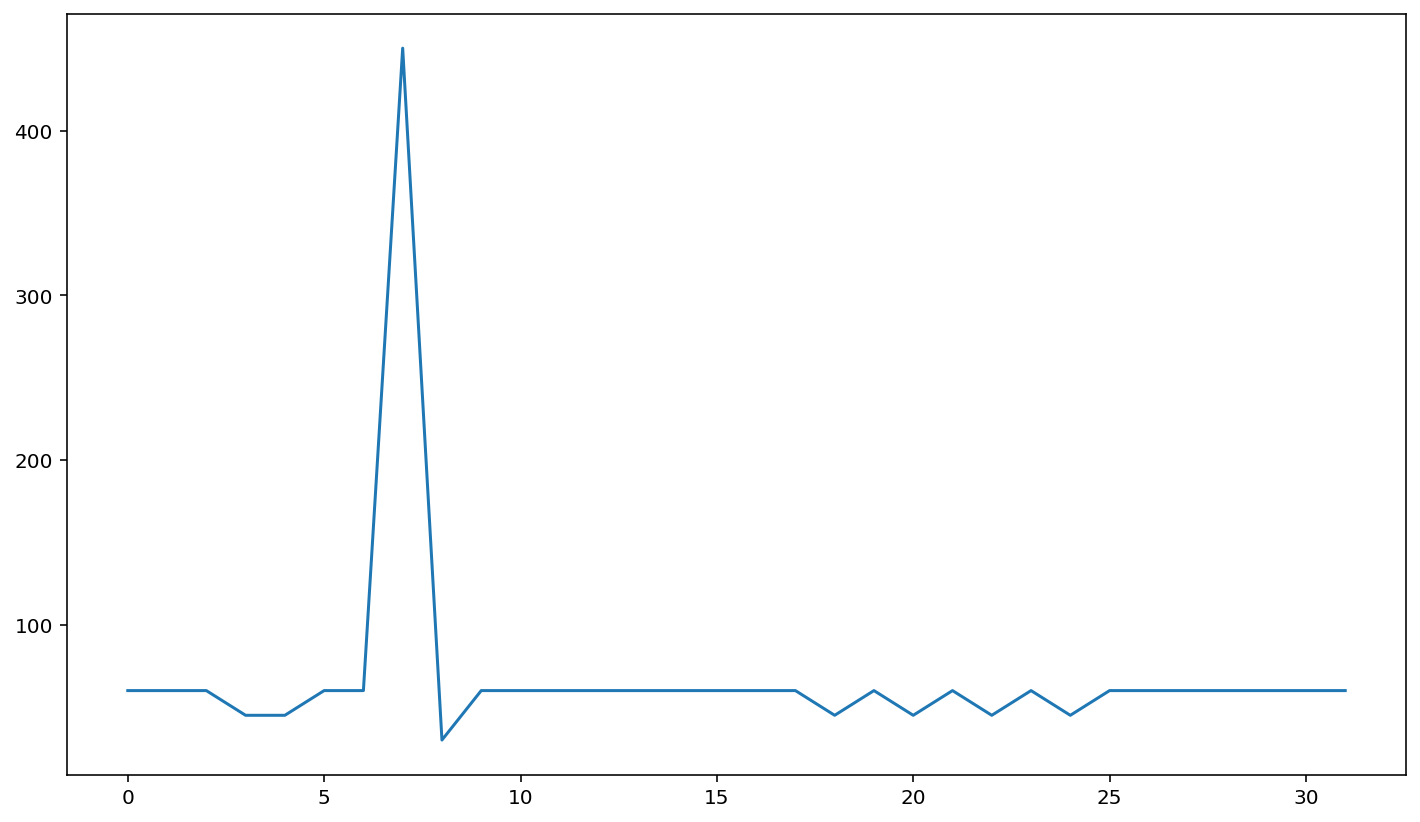

In [4]:
## let's create a basic line plot

plt.plot(data['Duration']); # makes a basic line plot, where the x is the index and the y is the value in the columns

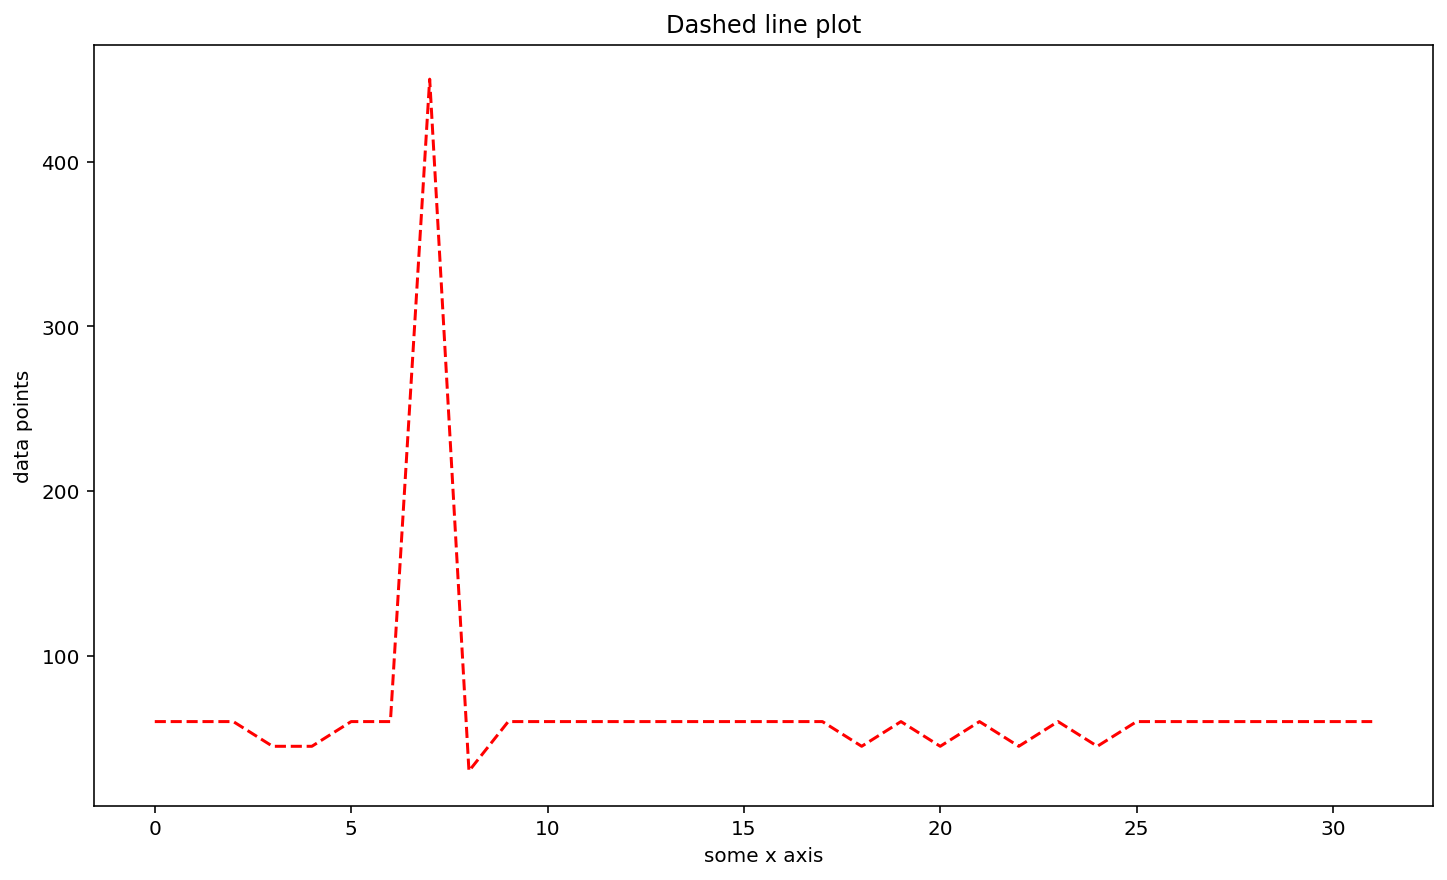

In [5]:
## but can customize your line plot

plt.plot(data.index.tolist(), data['Duration'], color='r', linestyle='--') # change the color and linestyle
plt.title('Dashed line plot')
plt.xlabel('some x axis')
plt.ylabel('data points'); 

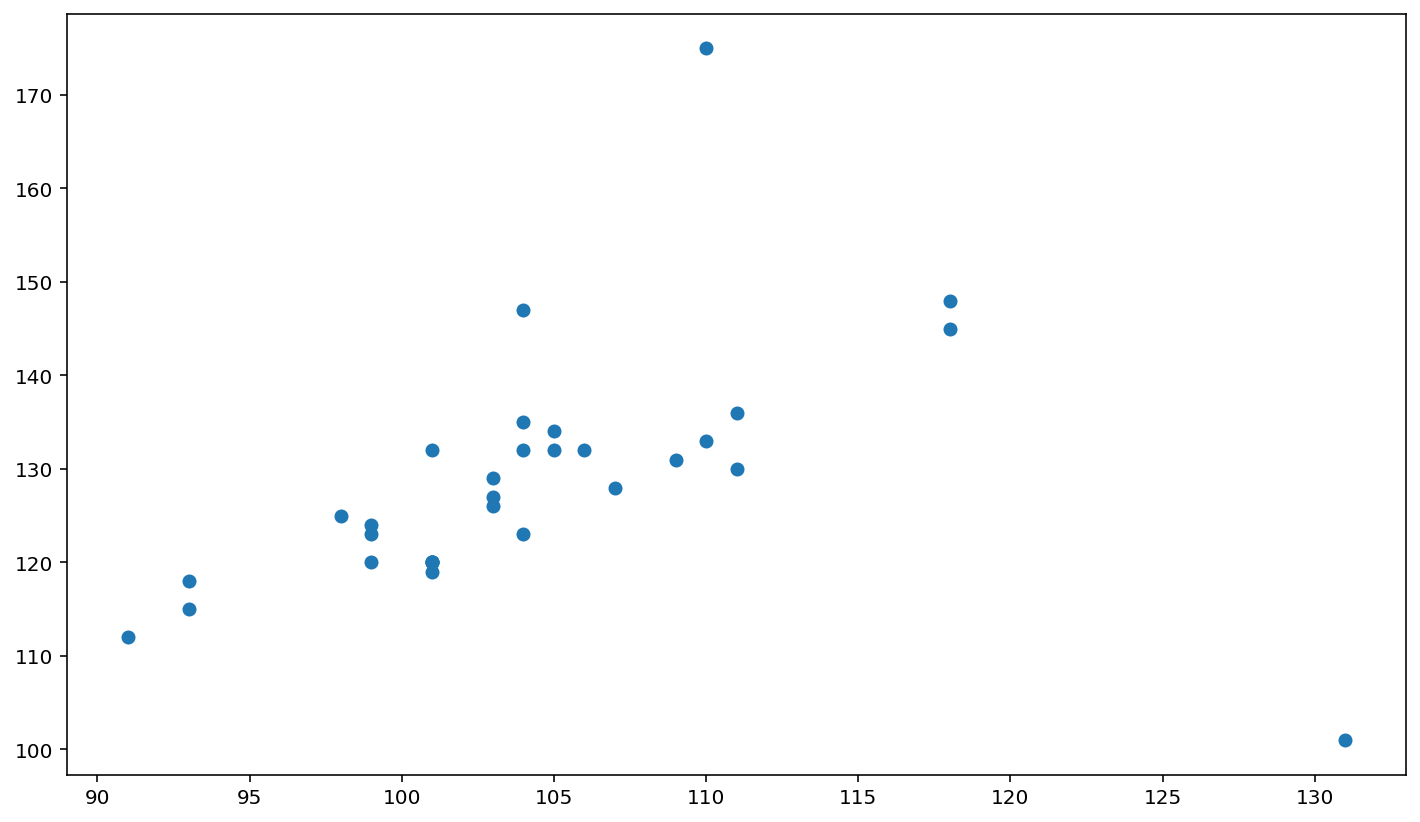

In [6]:
## you can create a scatterplot with matplotlib

plt.scatter(data['Pulse'], data['Maxpulse']);

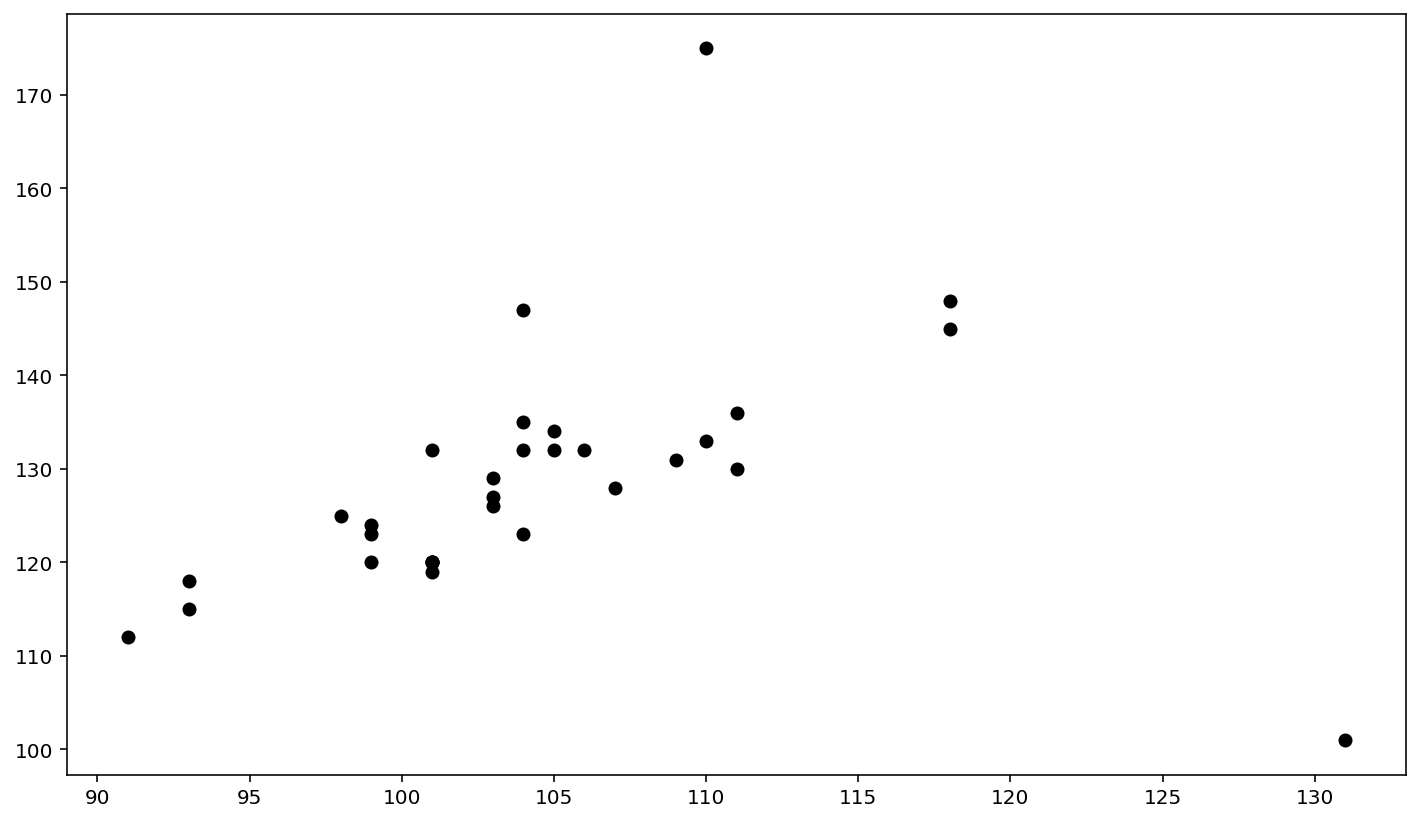

In [7]:
## sometimes the plt.scatter() can be slow, so you can create one with plt.plot() too!

plt.plot(data['Pulse'], data['Maxpulse'], 'o', color='k');

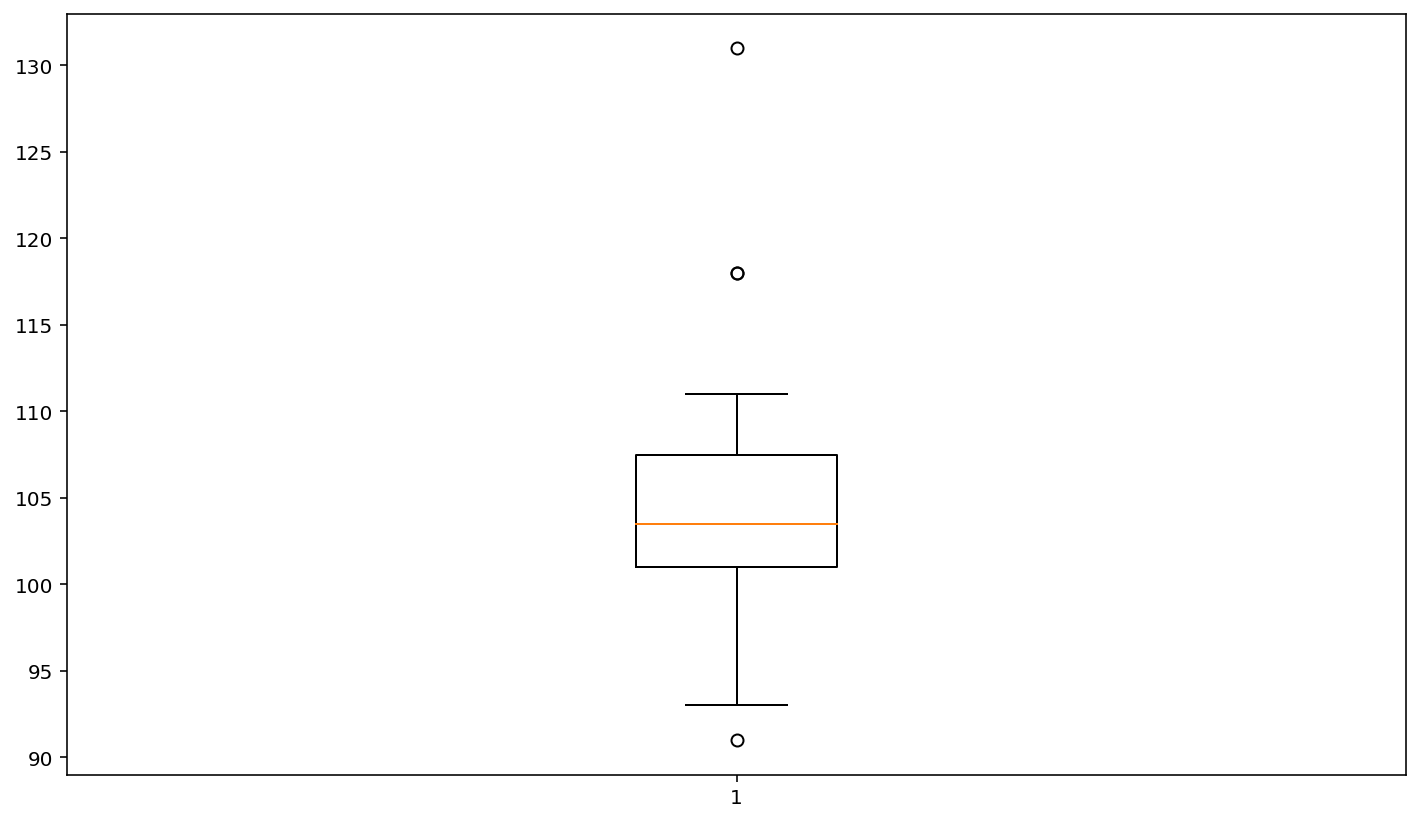

In [8]:
## let's create a boxplot with matplotlib

plt.boxplot(data['Pulse']);

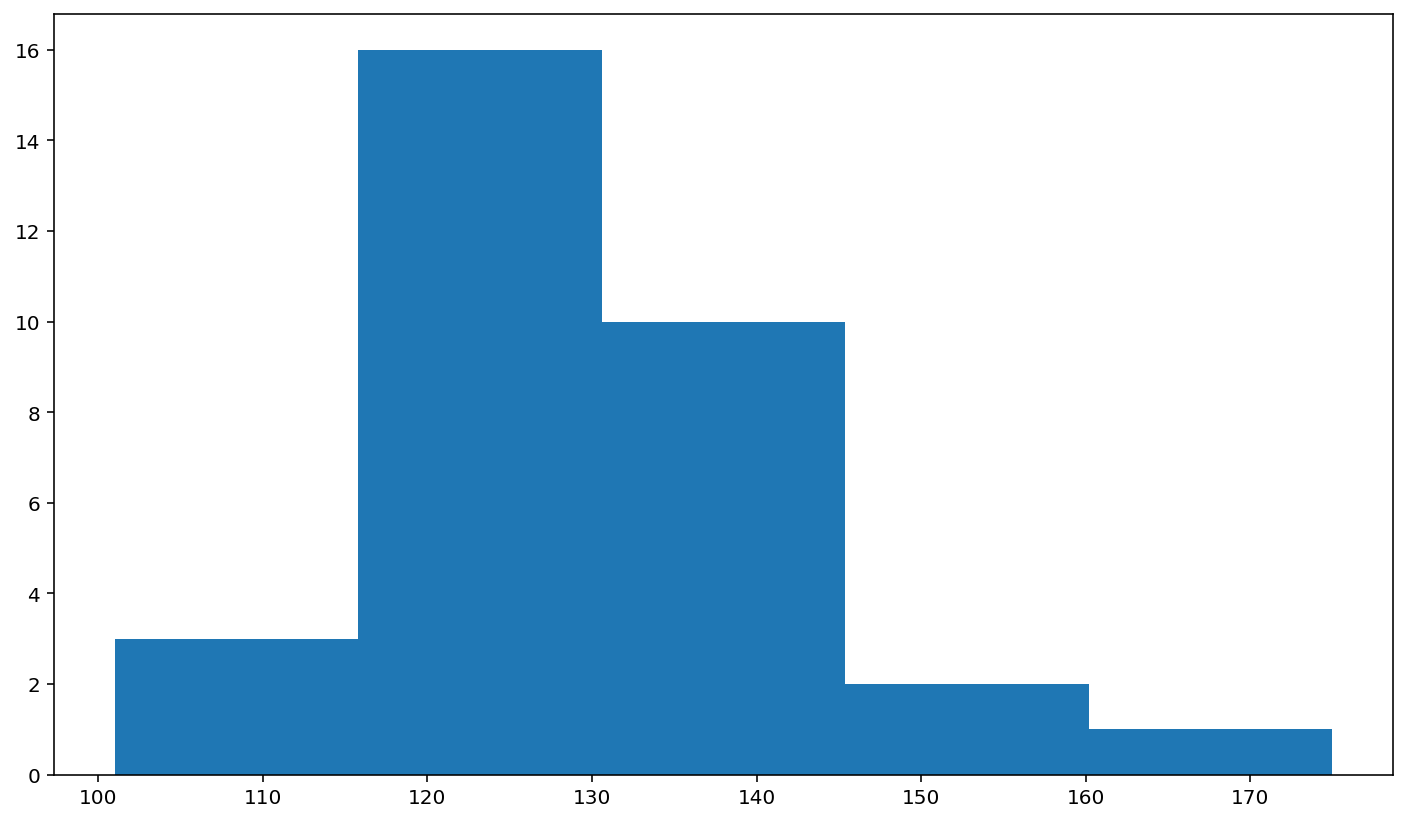

In [9]:
## let's create a histogram!

plt.hist(data['Maxpulse'], bins=5);

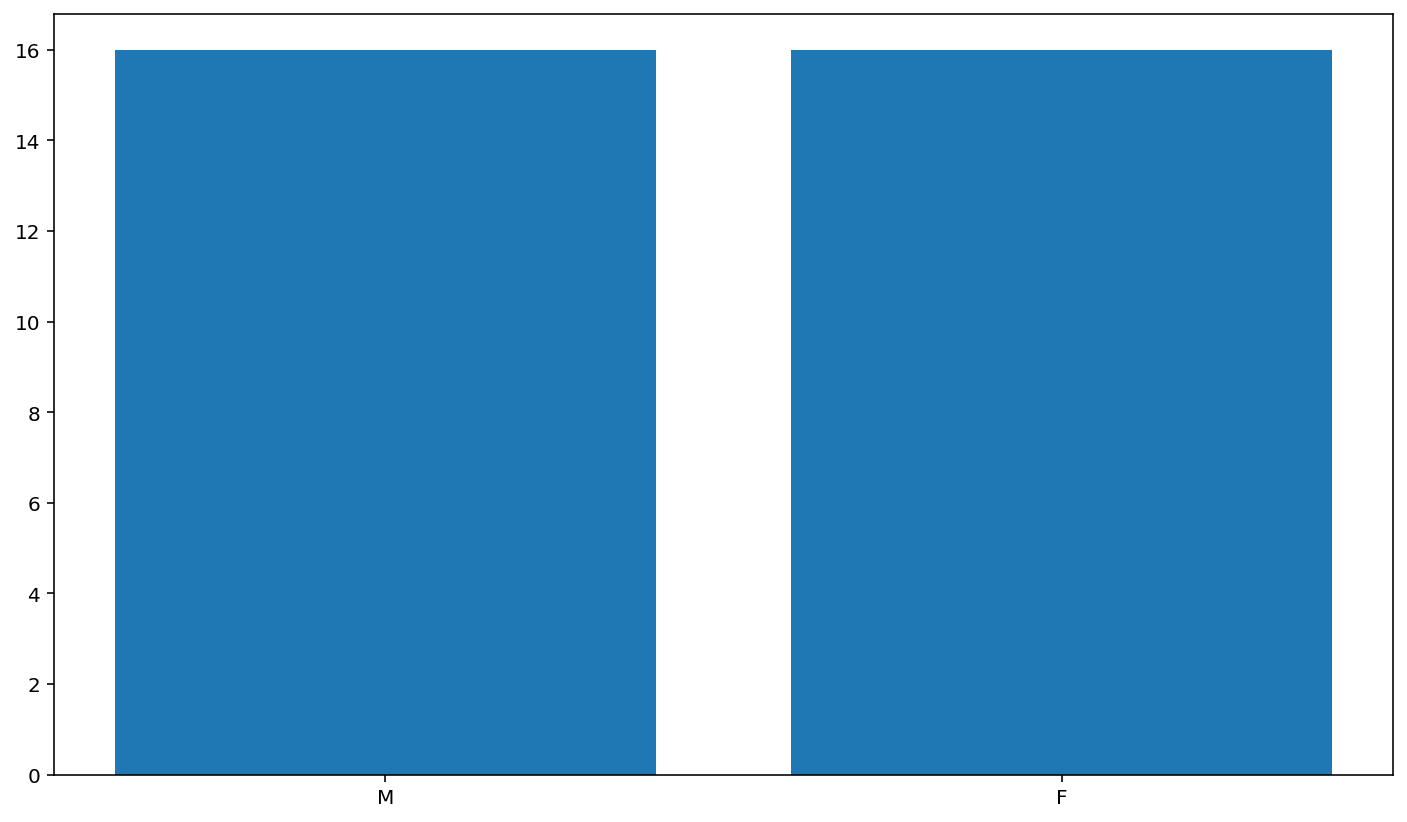

In [10]:
## let's create a barplot for the counts of M and F

plt.bar(x=data['Sex'].unique(), height=data['Sex'].value_counts());

Now you might be wondering: wow! `matplotlib` seems super easy to use and seems like I can do anything with it. You're probably right with the second one but definitely not with the first one... Sure, for these simple plots and a little more basic usage, `matplotlib` isn't bad, but as soon as you want to customize your plots further, things start to get complicated. The lines of code start adding on and before you know it, a simple boxplot separated by categories takes 10 lines of code to create!  


Luckily, there's `seaborn`! `seaborn` tries to get around this cryptic-ness and complication of `matplotlib` and because it builds on top of it, you can easily use `seaborn` and `matplotlib` together to really create some beautiful plots without the need for much boilerplate! So let's see some of the functionality of seaborn! You can make all of the same plots with `seaborn` as you can with `matplotlib` but we'll do some more extra stuff with it.

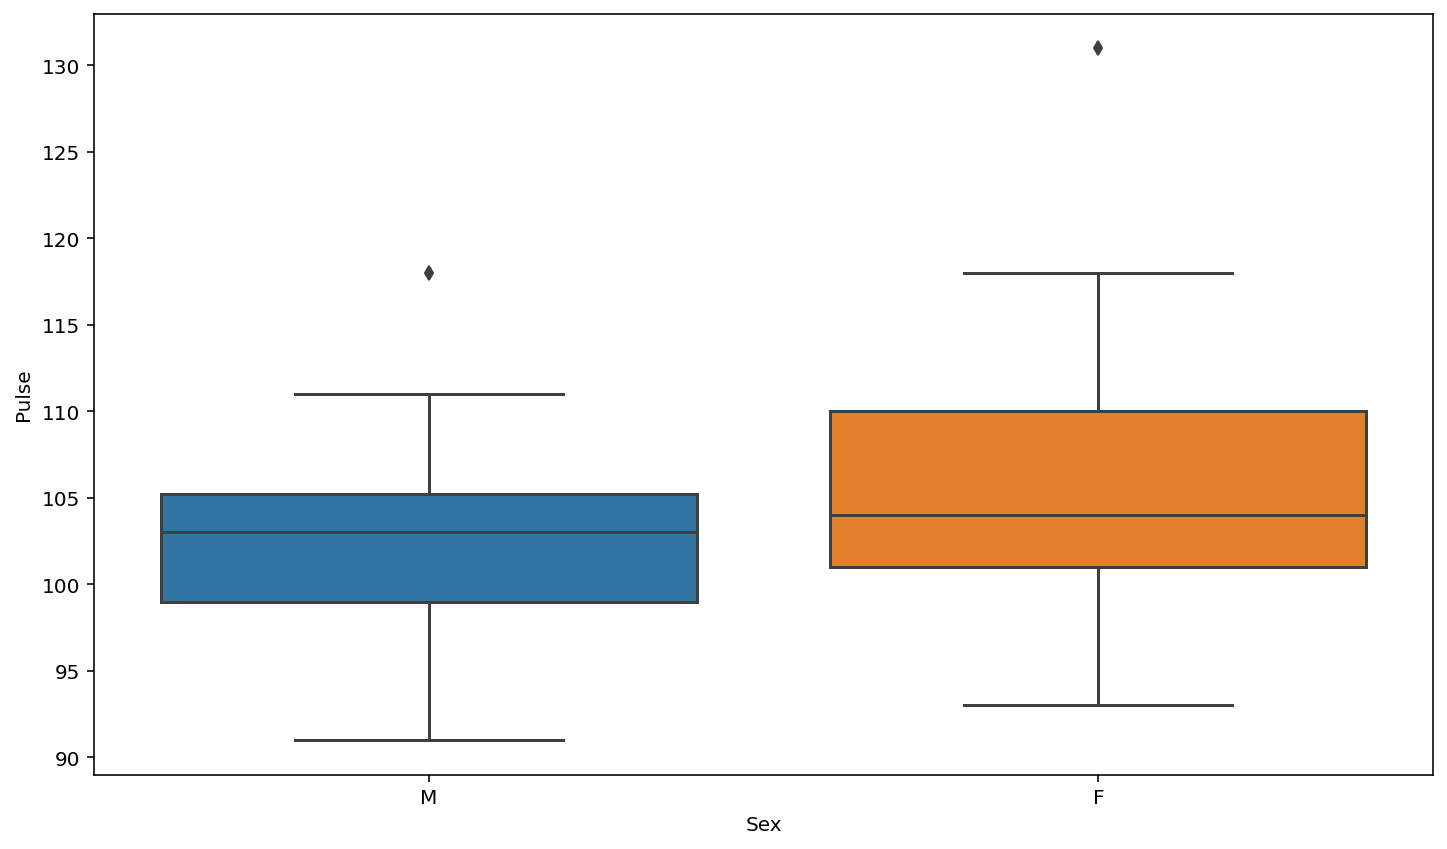

In [11]:
## lets first make a boxplot and separate it by sex!

sns.boxplot(data, x='Sex', y='Pulse');

In [12]:
## now lets do something wild to show the fun about using seaborn!

## lets create a new categorical column called 'Smoker' and assign the values randomly -- this is just for fun!

data['Smoker'] = np.random.choice(['Smoker', 'Non-Smoker'], data.shape[0])

data.head()

,Duration,Date,Pulse,Maxpulse,Calories,Sex,Smoker
0,60,'2020/12/01',111,130,409.1,M,Smoker
1,60,'2020/12/02',118,145,479.0,M,Non-Smoker
2,60,'2020/12/03',104,135,340.0,F,Smoker
3,45,'2020/12/04',110,175,282.4,F,Smoker
4,45,'2020/12/05',118,148,406.0,F,Non-Smoker


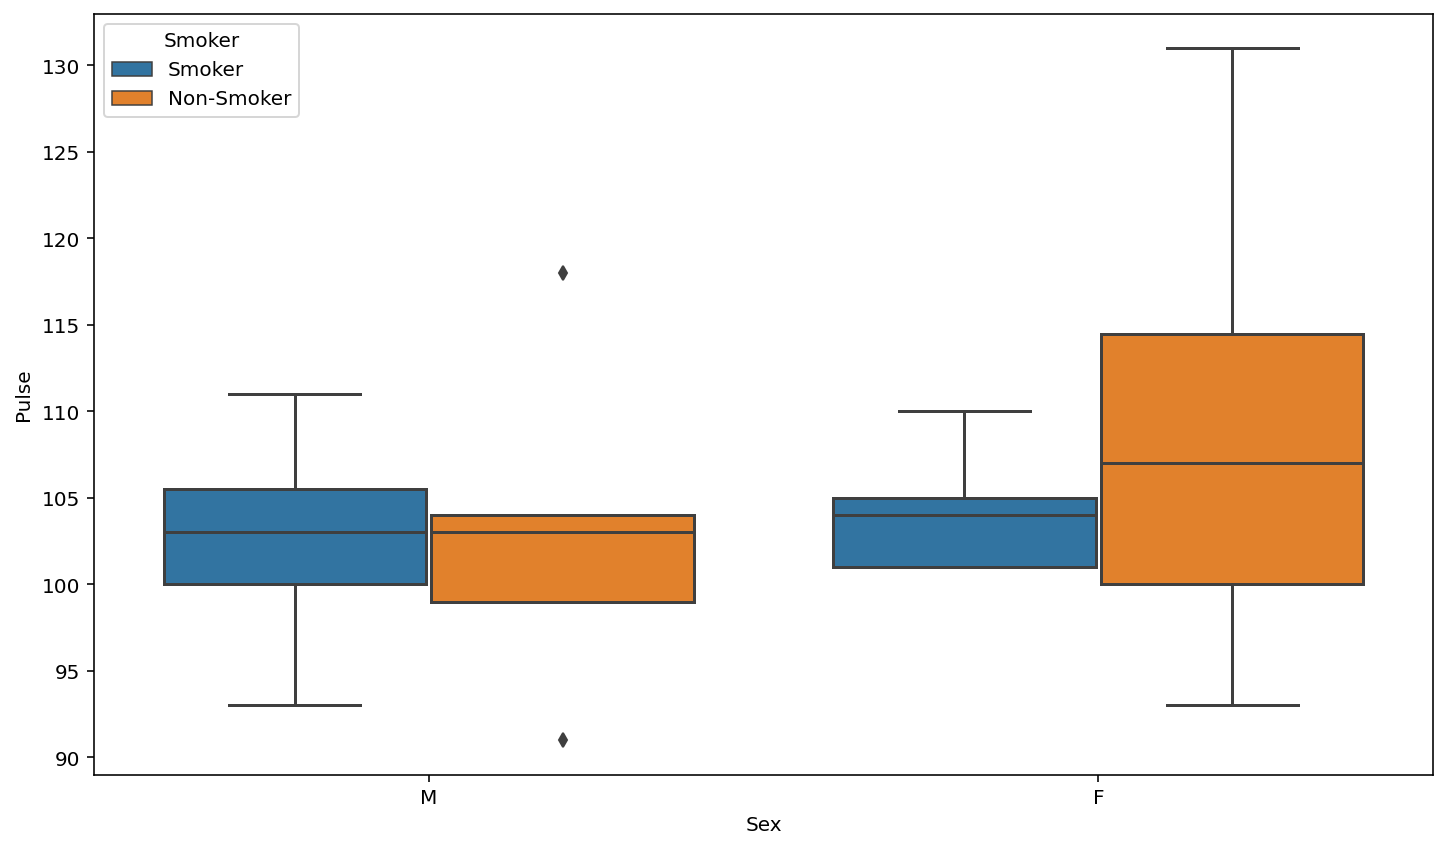

In [13]:
## now lets create the same boxplot as before but this time further separating them by the Smoker category

sns.boxplot(data, x='Sex', y='Pulse', hue='Smoker');

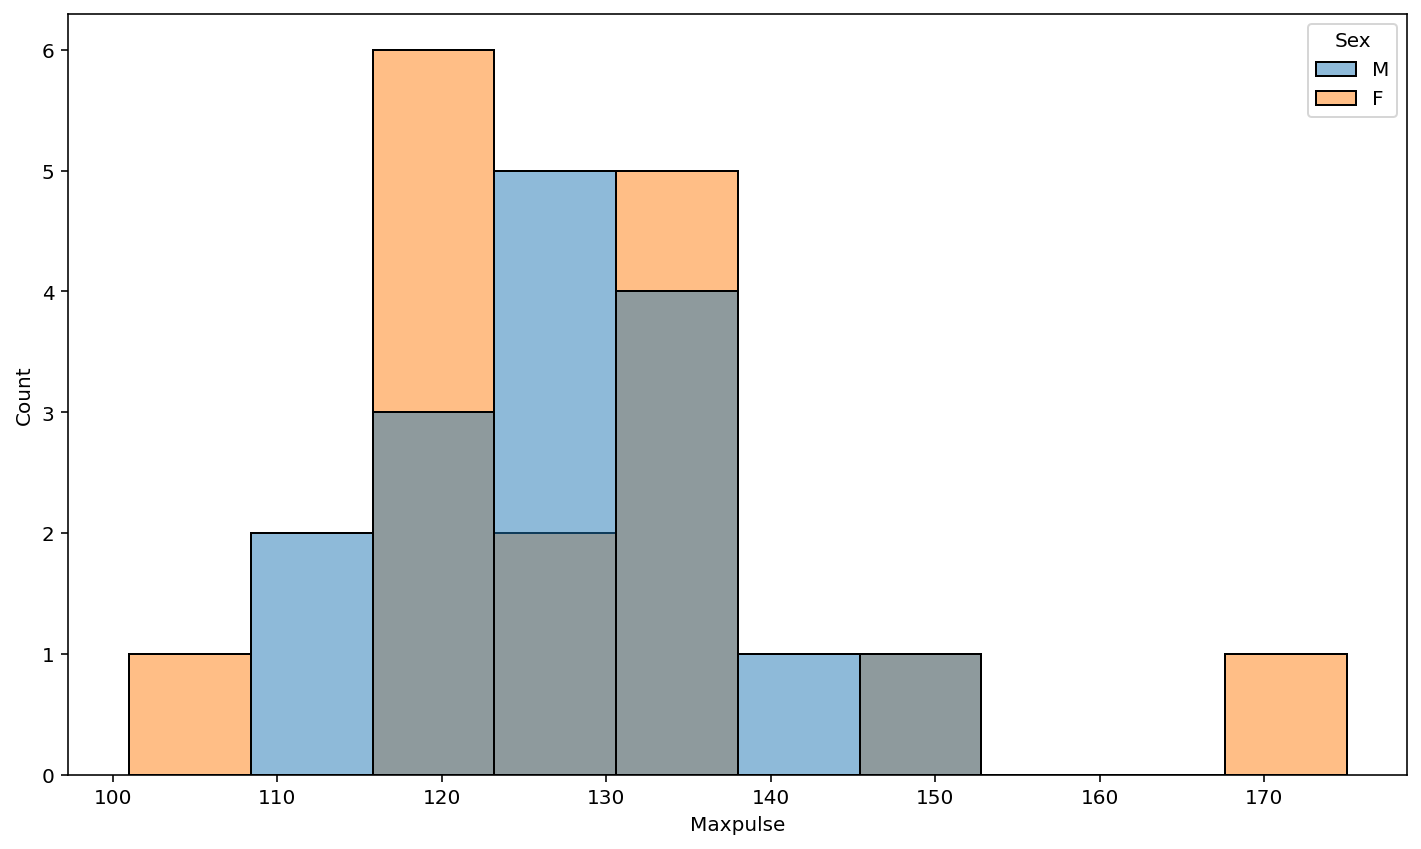

In [14]:
## now we can use the `hue` argument with other seaborn plots too!

sns.histplot(data, x='Maxpulse', hue='Sex');

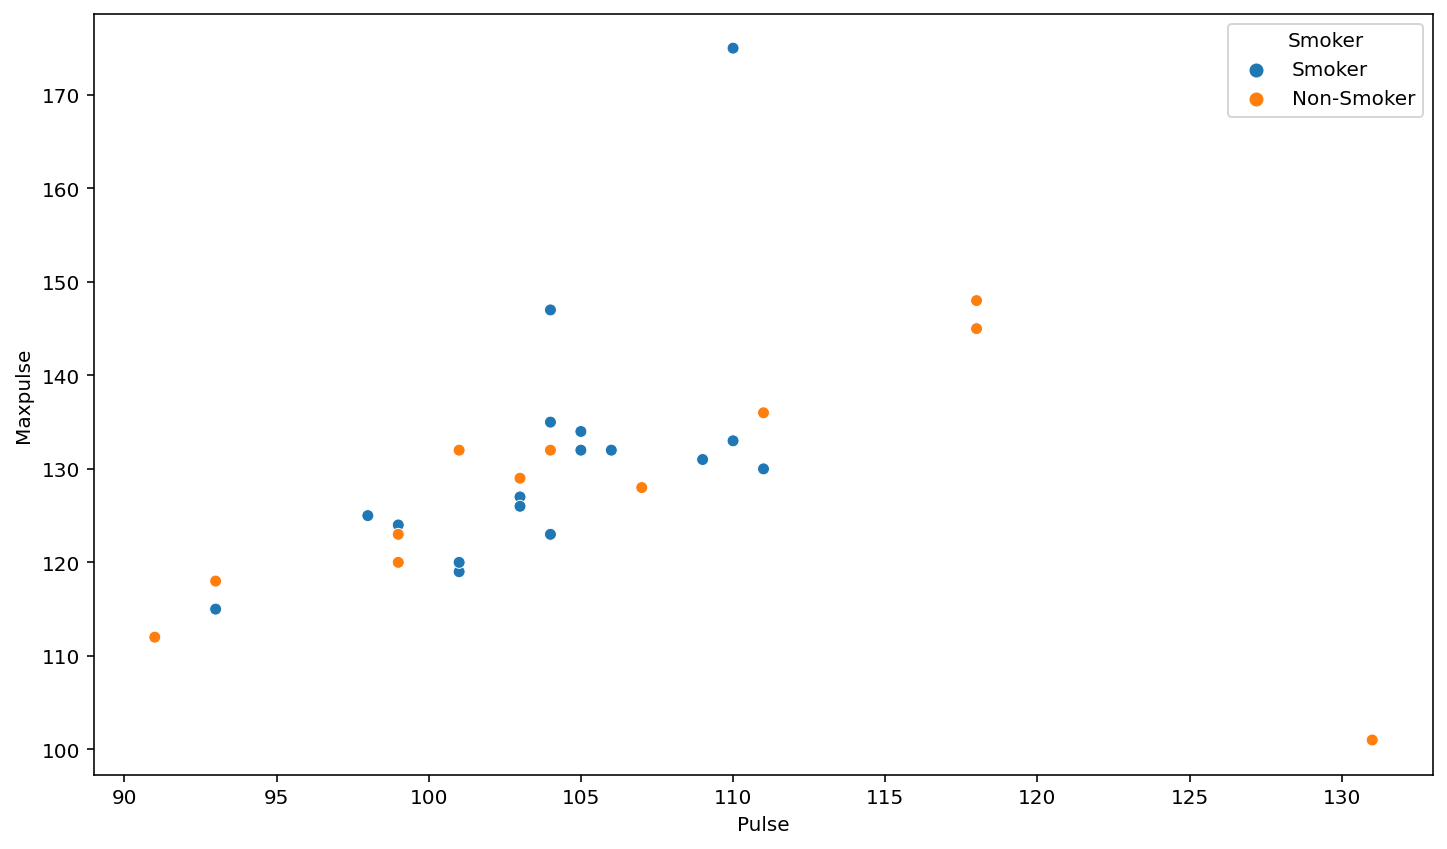

In [15]:
sns.scatterplot(x=data['Pulse'], y=data['Maxpulse'], hue=data['Smoker']);

In [16]:
## let's now create a heatmap

numerical_data = data[['Maxpulse', 'Pulse', 'Calories']].fillna(0) # fill in any missing values with 0

## let's say we want to find the correlation between these three variables and show it in one visual -- heatmap!

correlations_of_vars = np.corrcoef(numerical_data.to_numpy(), rowvar=False) # find the Pearson correlation coefficients

correlations_of_vars_df = pd.DataFrame(correlations_of_vars, index=numerical_data.columns.tolist(), columns=numerical_data.columns.tolist())

correlations_of_vars_df.shape

(3, 3)

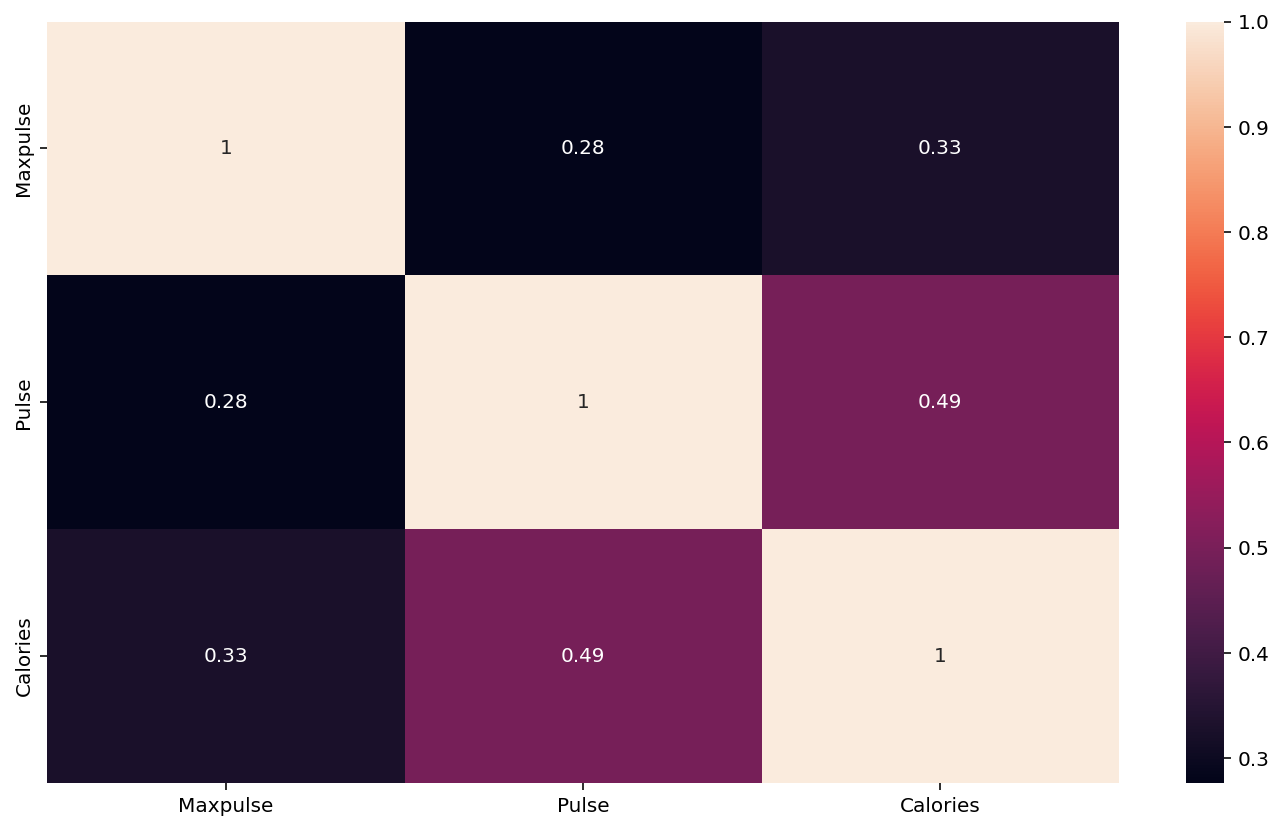

In [17]:
## let's visualize this!

sns.heatmap(correlations_of_vars_df, annot=True);

**Creating subplots**  

Now here's where you need to know the difference between a `figure` and `axes` in `matplotlib` - when we want to create `subplots`.

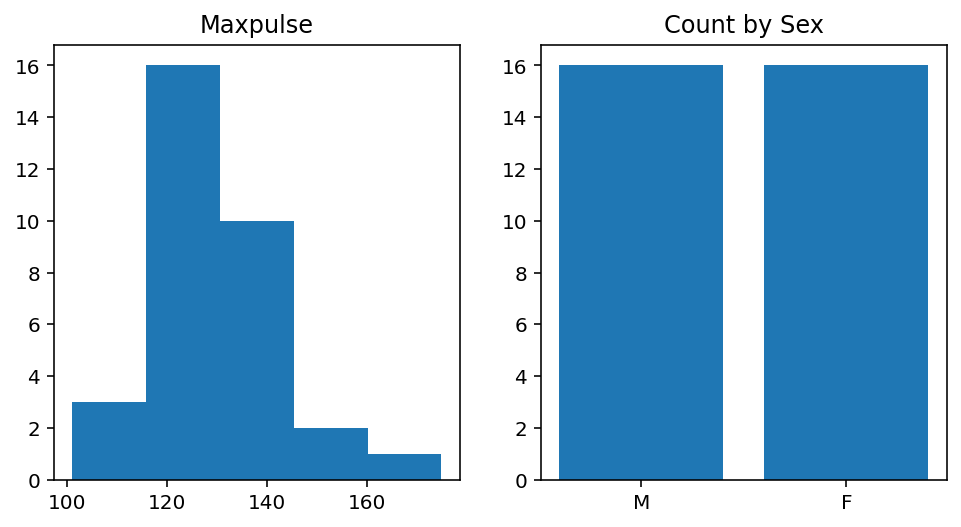

In [18]:
fig, ax = plt.subplots(1,2, figsize=(8,4)) # fig is the whole thing!

ax[0].hist(data['Maxpulse'], bins=5)
ax[0].set_title('Maxpulse') # an ax is a different object that you can access 
ax[1].bar(x=data['Sex'].unique(), height=data['Sex'].value_counts())
ax[1].set_title('Count by Sex');

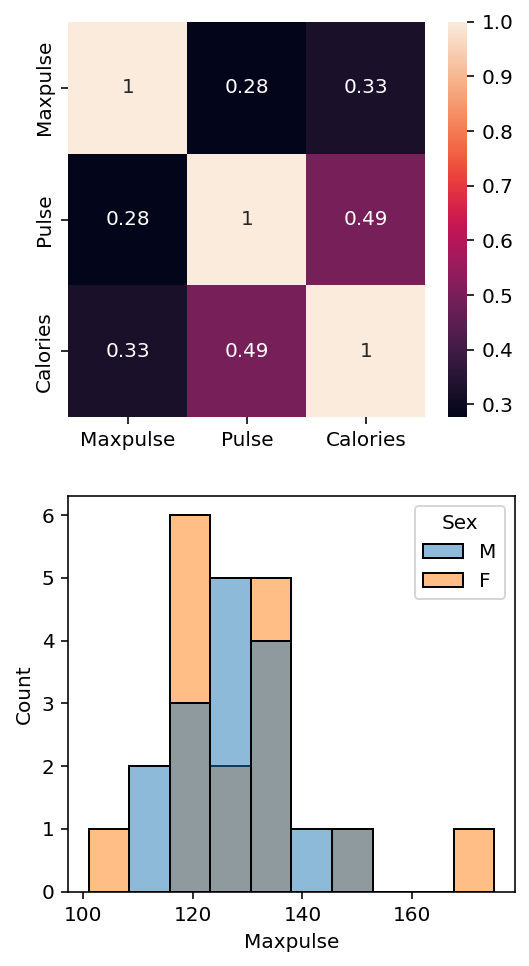

In [19]:
## you can also create subplots with seaborn - every seaborn function has an `ax` argument

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(4,8))

sns.heatmap(correlations_of_vars_df, annot=True, ax=ax1)
sns.histplot(data, x='Maxpulse', hue='Sex', ax=ax2);